# Computer Assignment 5 (Machine Learning)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
DATASET_PATH = 'data/diabetes.csv'

## Checking the Dataset

In [3]:
dataset = pd.read_csv(DATASET_PATH)
display(dataset)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,NaN,63.0,0
764,2.0,122.0,70.0,NaN,0.0,36.8,0.340,NaN,0
765,5.0,NaN,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,NaN,0.0,30.1,0.349,NaN,1


### 1- Info and Describe methods

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


As the info() method shows, the dataset has 9 columns and 768 rows. The columns are described as follows:

* Pregnancies: Number of pregnancies  
  `type: integer (it is float64 in the dataset because of the missing values)`

* Glucose: Plasma glucose level  
  `type: integer (it is float64 in the dataset because of the missing values)`

* BloodPressure  
  `type: integer (it is float64 in the dataset because of the missing values)`

* SkinThickness  
  `type: integer (it is float64 in the dataset because of the missing values)`

* Insulin: Plasma insulin level  
  `type: integer (it is float64 in the dataset because of the missing values)`

* BMI: Body mass index  
  `type: float64`

* DiabetesPedigreeFunction: Diabetes pedigree risk function  
  `type: float64`

* Age: Age in years  
  `type: integer (it is float64 in the dataset because of the missing values)`

* Outcome: Class variable (0: No diabetes, 1: Diabetes)  
  `type: integer`

In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


The describe() method shows the following statistics for each feature:

* count: Number of non-missing values
* mean: Mean of the values
* std: Standard deviation of the values
* min: Minimum value
* 25%: First quartile
* 50%: Second quartile (median)
* 75%: Third quartile
* max: Maximum value

### 2- Number of missing values and their percentage for each feature

In [6]:
rowCount = dataset.shape[0]
for col in dataset.columns:
    nan = dataset[col].isna().sum()
    print(f'Number of NaN values in {col:30}-> {nan:3} ({nan / rowCount * 100:5.2f}%)')

Number of NaN values in Pregnancies                   -> 133 (17.32%)
Number of NaN values in Glucose                       -> 114 (14.84%)
Number of NaN values in BloodPressure                 ->  88 (11.46%)
Number of NaN values in SkinThickness                 -> 144 (18.75%)
Number of NaN values in Insulin                       ->  88 (11.46%)
Number of NaN values in BMI                           ->  84 (10.94%)
Number of NaN values in DiabetesPedigreeFunction      -> 178 (23.18%)
Number of NaN values in Age                           -> 113 (14.71%)
Number of NaN values in Outcome                       ->   0 ( 0.00%)


### 3- Plotting the relationship between the features and the target

First we should delete the rows which have negative values in the features as they are not valid.

In [7]:
negatives = dataset[dataset < 0].dropna(how='all')
display(negatives)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
107,-4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,-22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-150.0,NaN
241,NaN,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN
395,NaN,-5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As it is shown above, the rows with negative values are completely invalid. So we can delete them.

In [8]:
valid = dataset.drop(negatives.index)
valid.reset_index(drop=True, inplace=True)
valid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,630.000000,649.000000,675.000000,621.000000,676.000000,679.000000,586.000000,652.000000,763.000000
mean,3.744444,121.263482,69.029630,20.388084,79.853550,32.109867,0.465191,33.449387,0.348624
std,3.352586,32.203394,19.418681,15.995033,115.715939,7.690181,0.319872,11.845480,0.476847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.350000,0.240750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


Now we can plot the relationship between the features and the target.

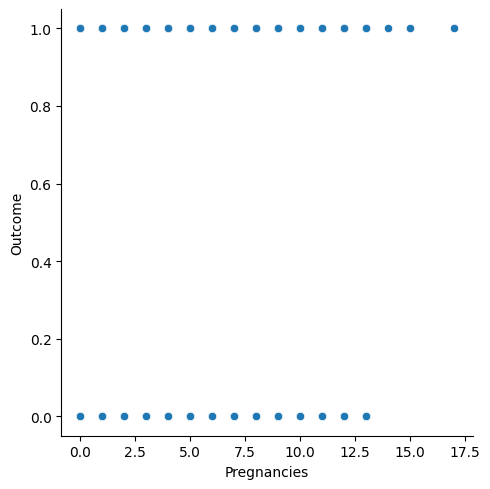

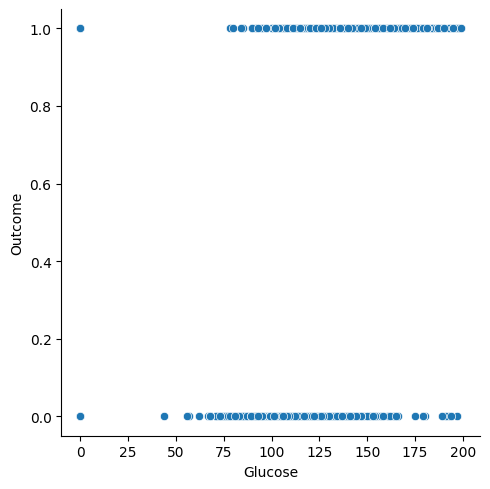

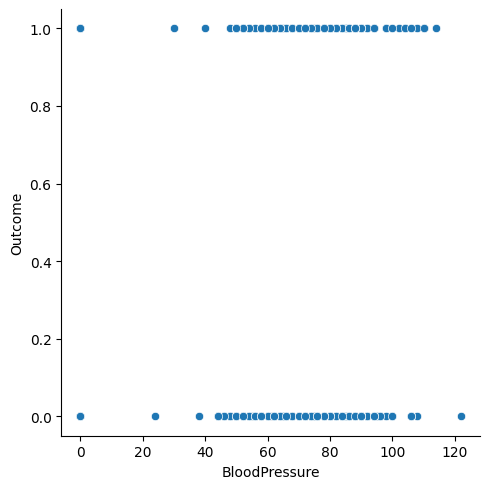

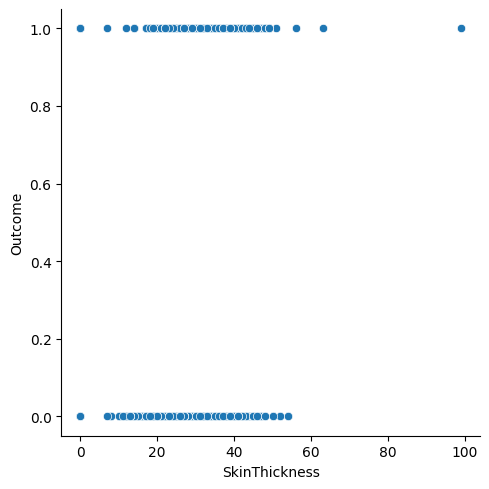

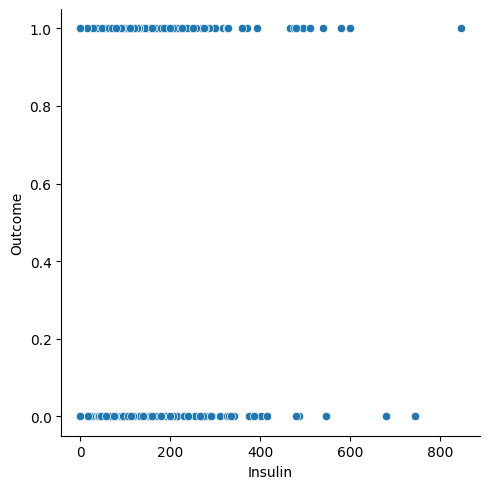

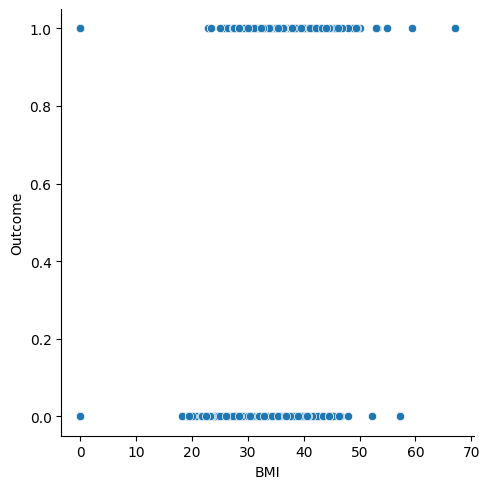

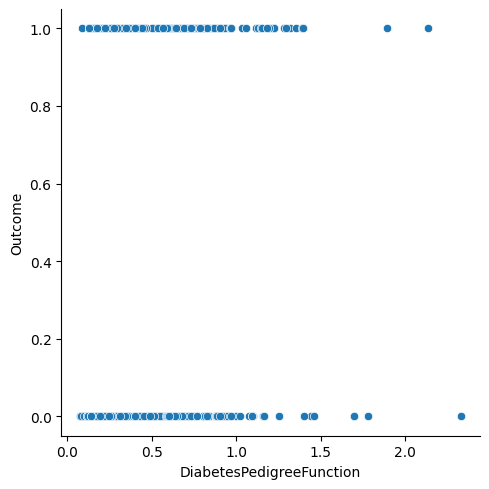

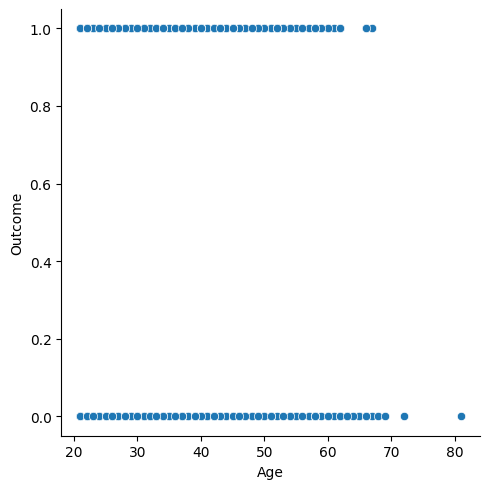

In [9]:
for col in valid.columns:
    if col == 'Outcome':
        continue
    sns.relplot(x=col, y='Outcome', data=valid, kind='scatter')

<AxesSubplot: >

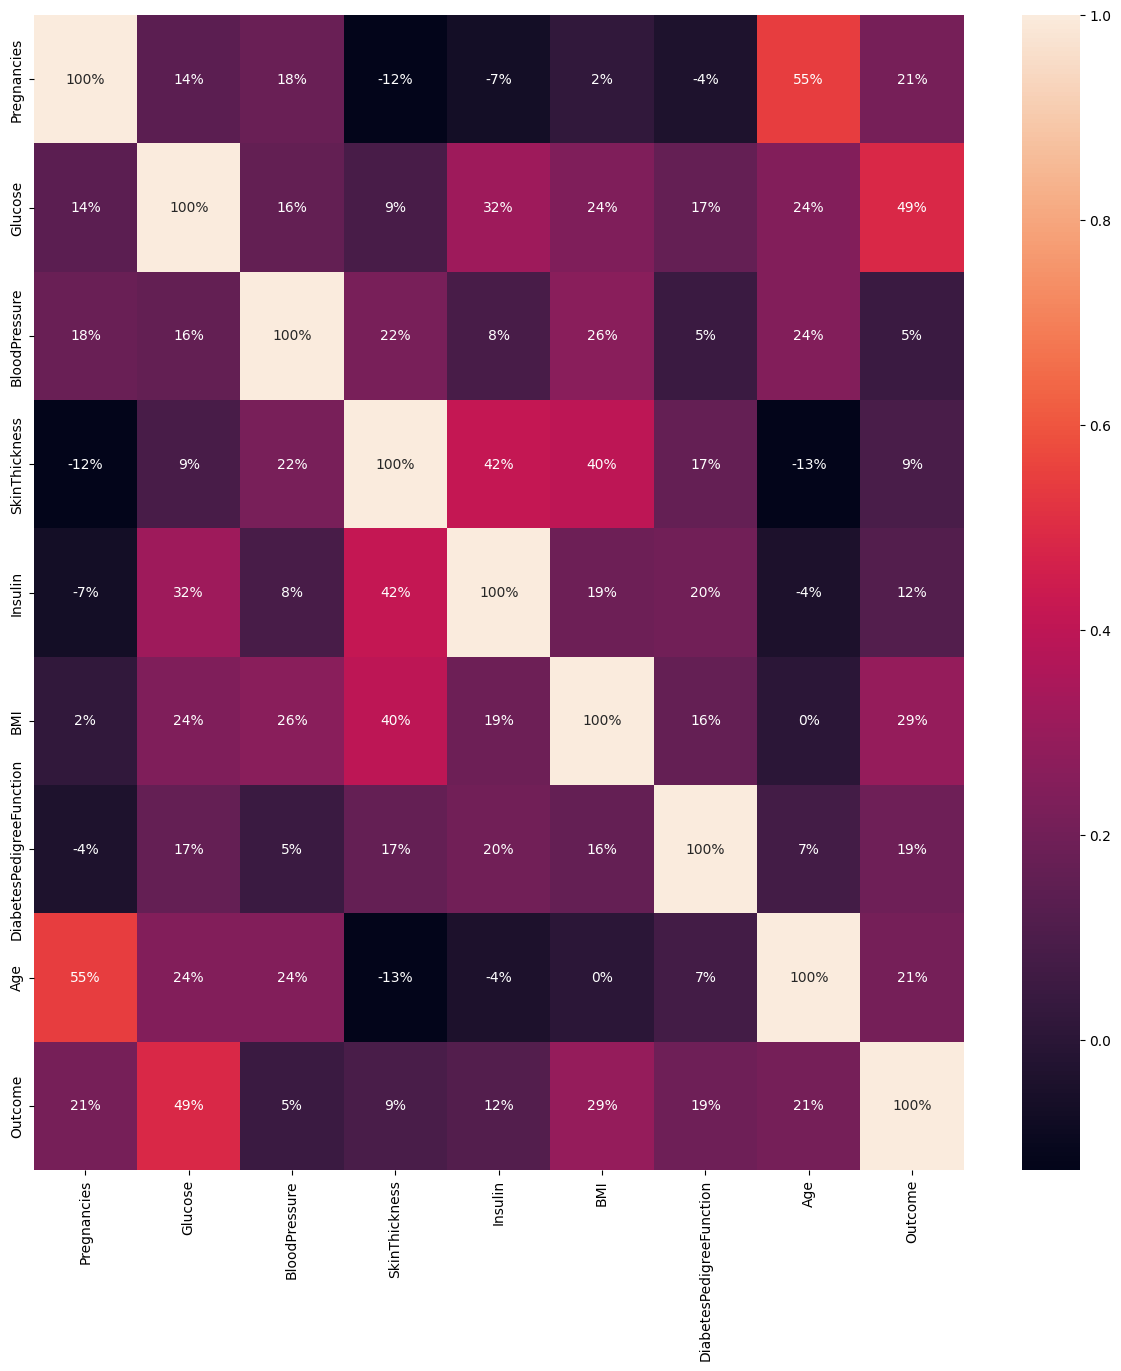

In [10]:
plt.figure(figsize=(15, 15))
sns.heatmap(valid.corr(), annot=True, fmt='.0%')

The plot shows that the **`Glucose`** feature has the most effect on the target.

### 4- Plotting unique values for each feature

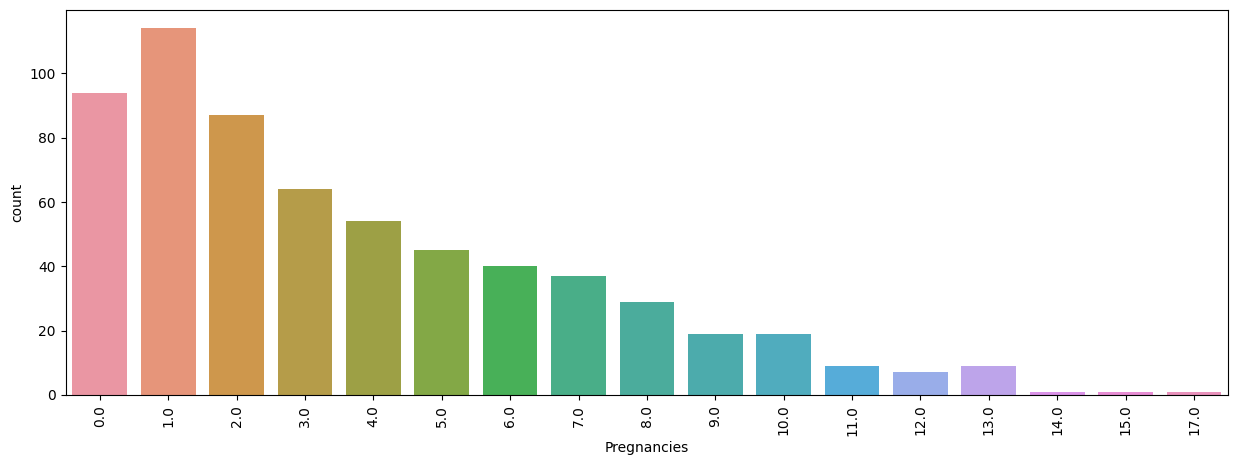

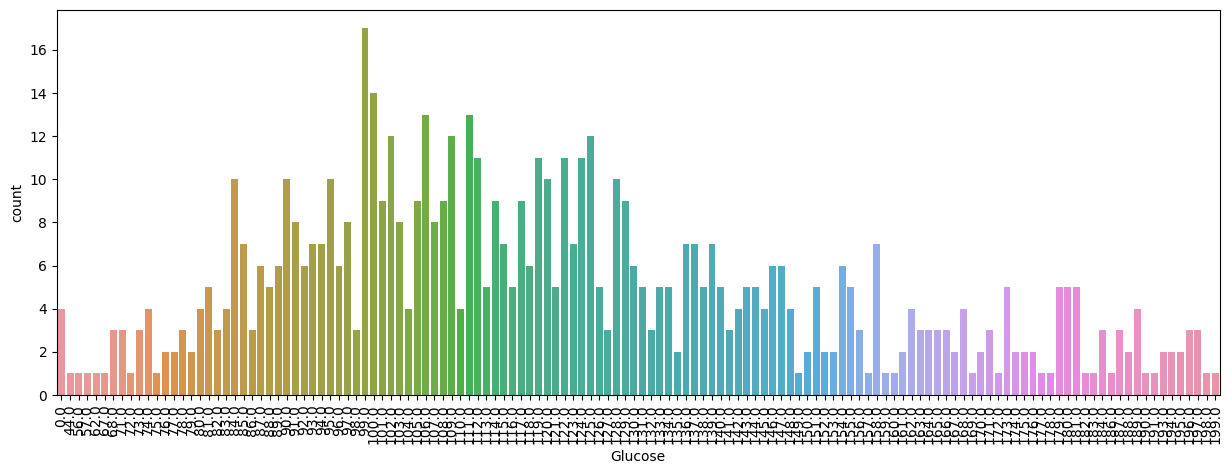

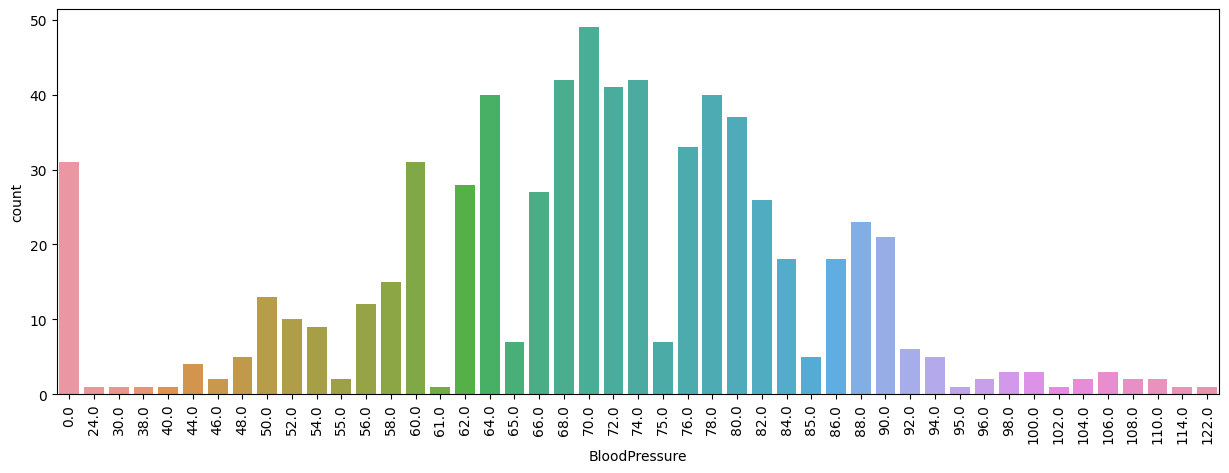

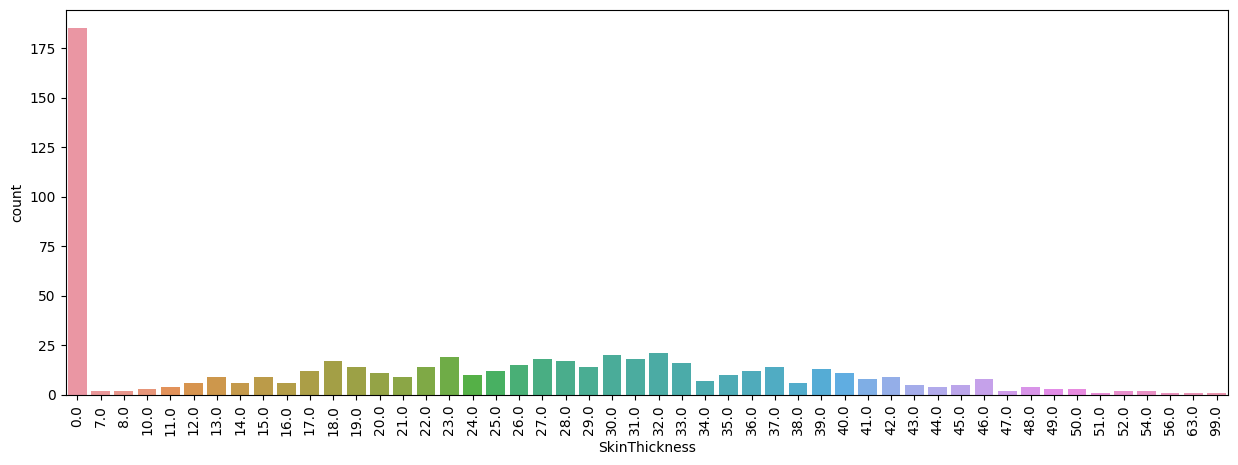

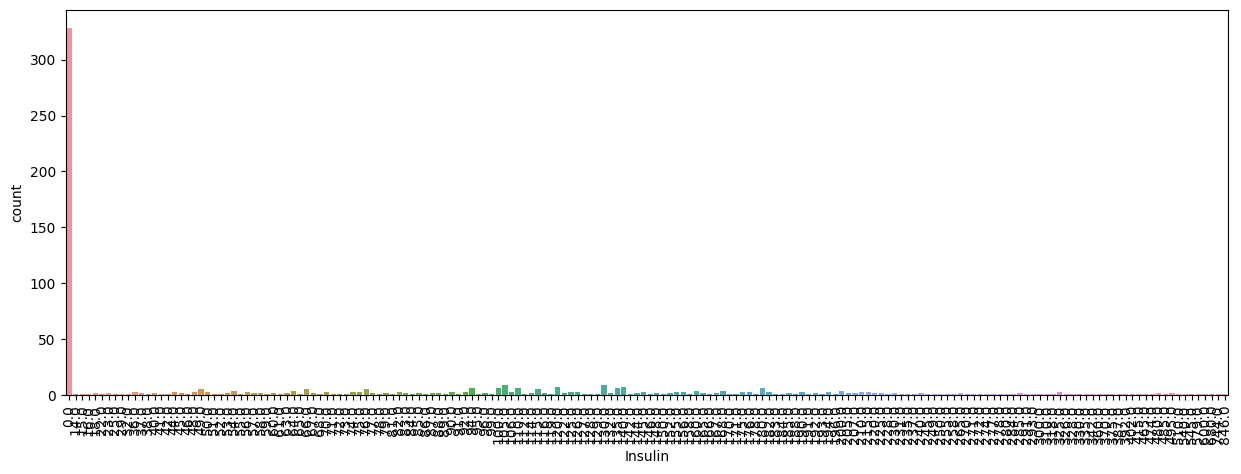

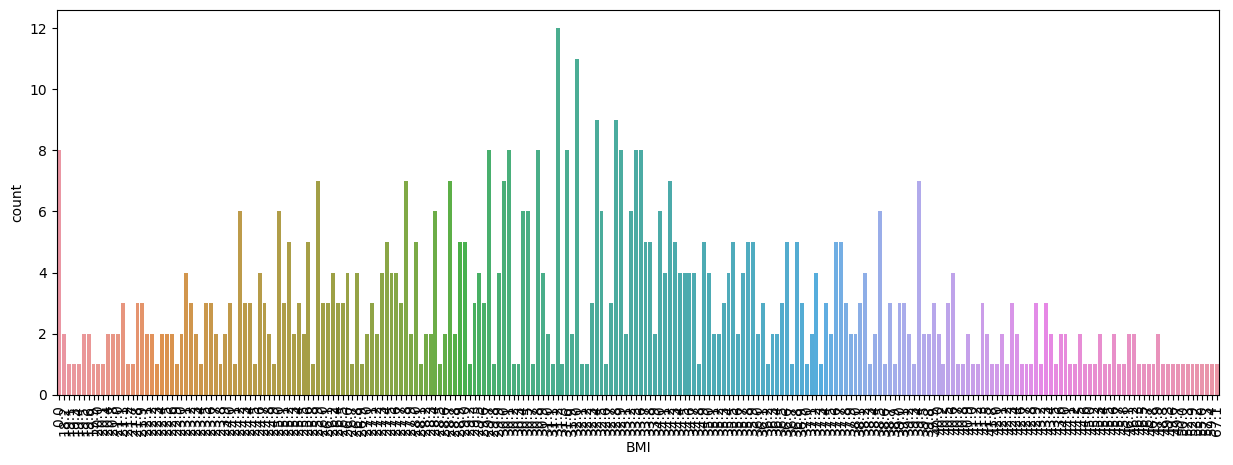

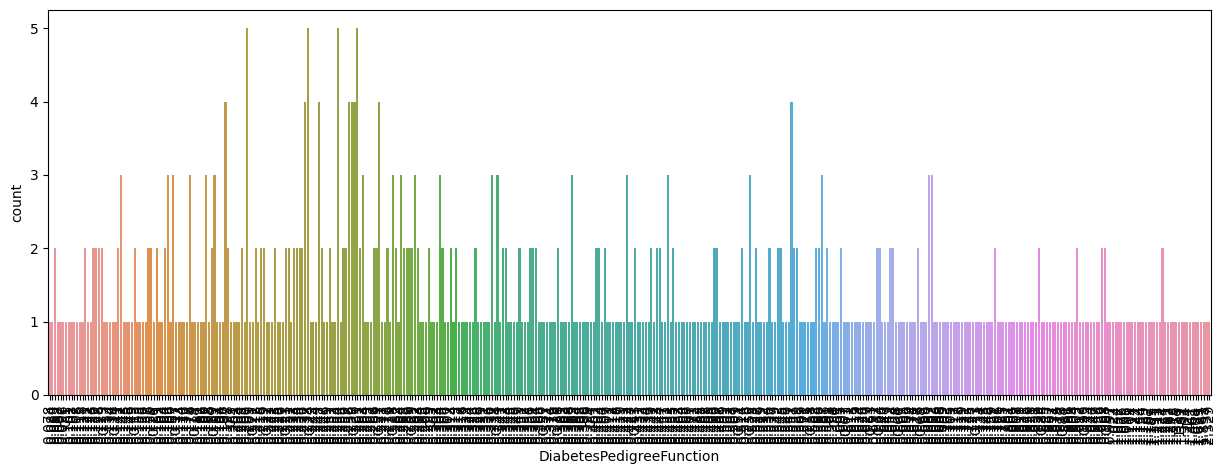

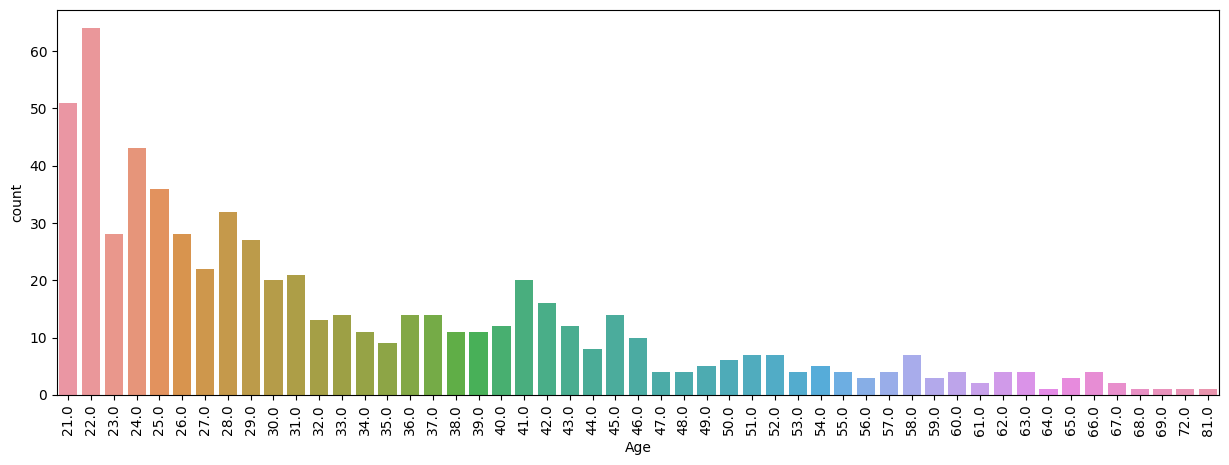

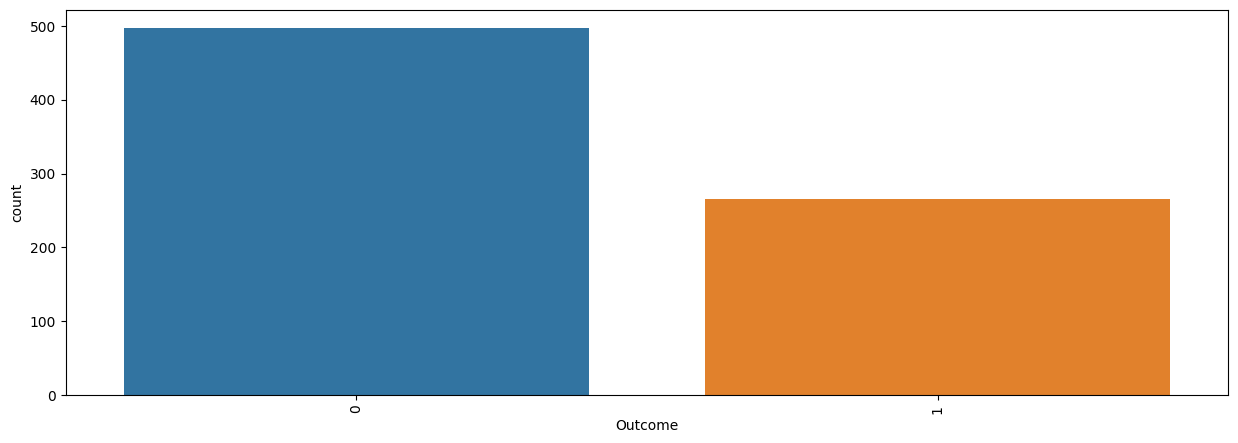

In [11]:
for col in valid.columns:
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=90)
    sns.countplot(x=col, data=valid)

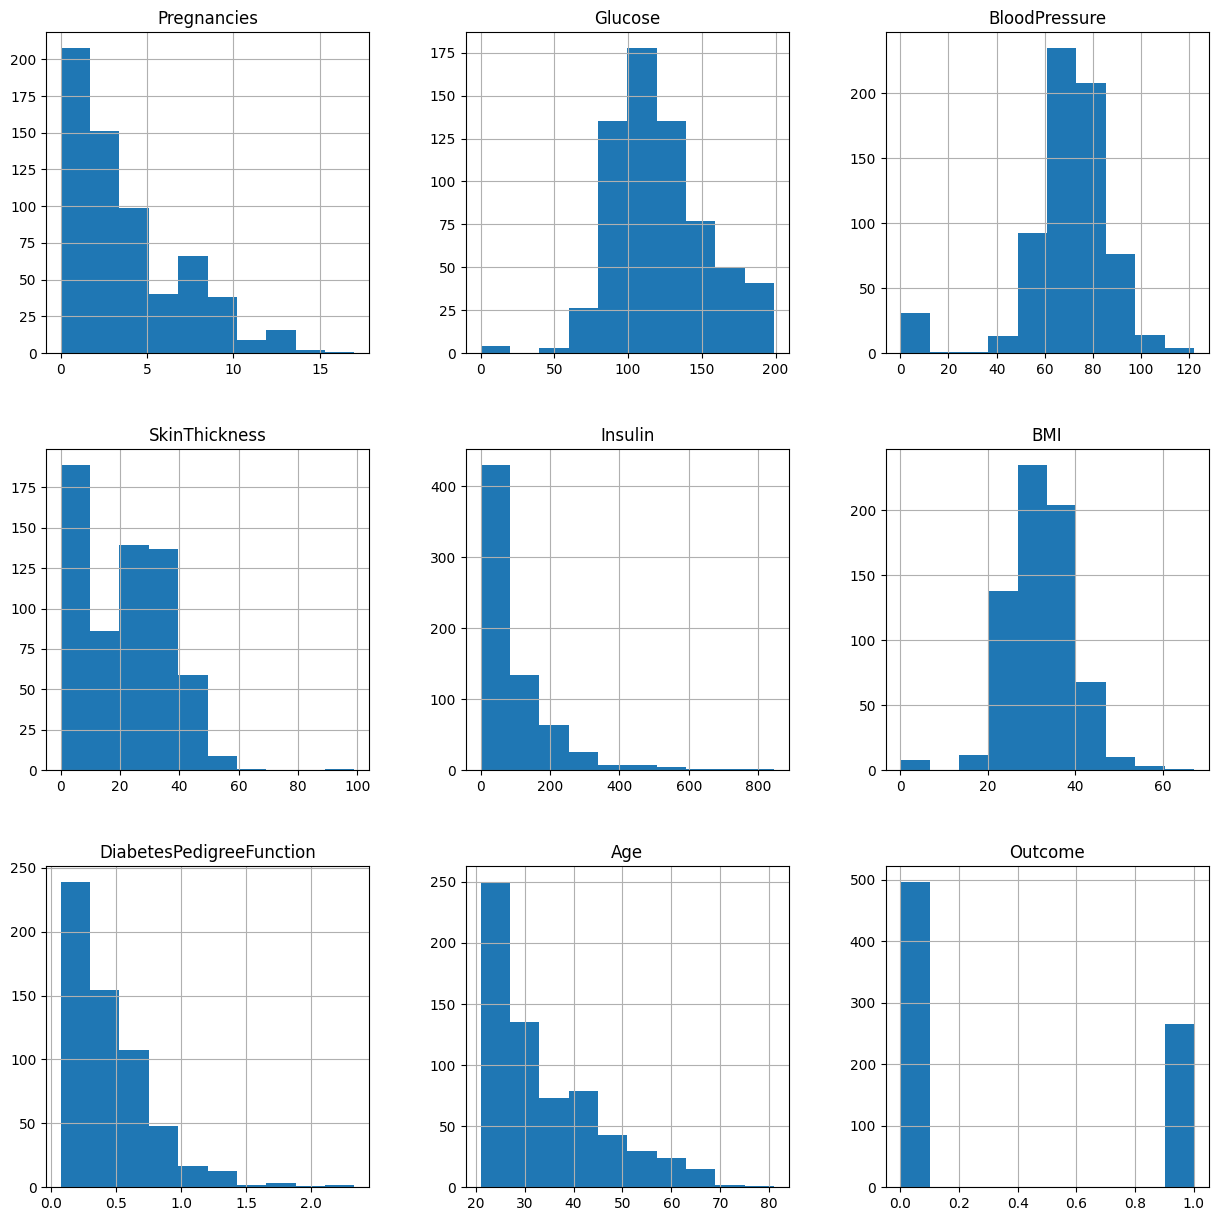

In [12]:
valid.hist(figsize=(15, 15))
plt.show()

### 5- Plotting the relationship between the features using hexbin

Scatter plots are shown above. Now we can plot the relationship between the features using hexbin.

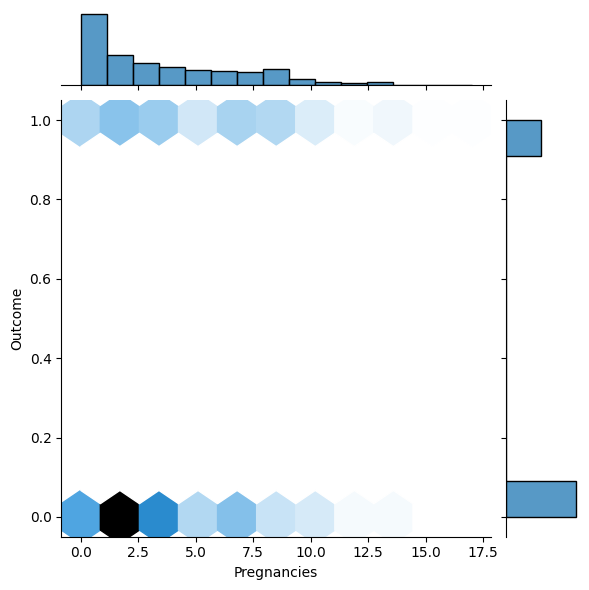

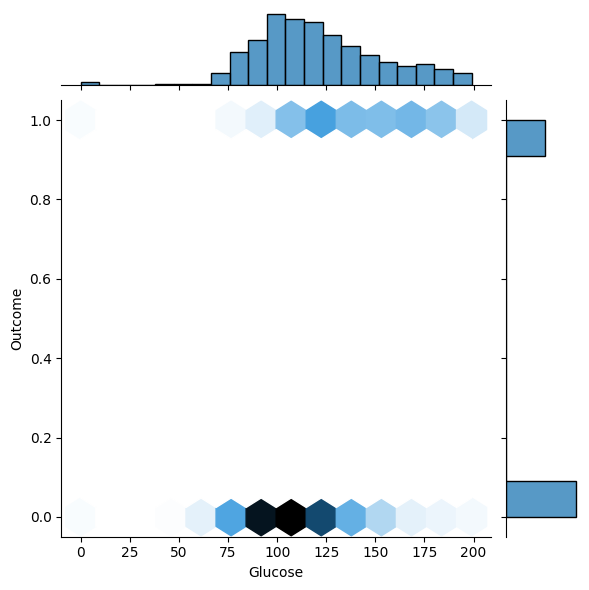

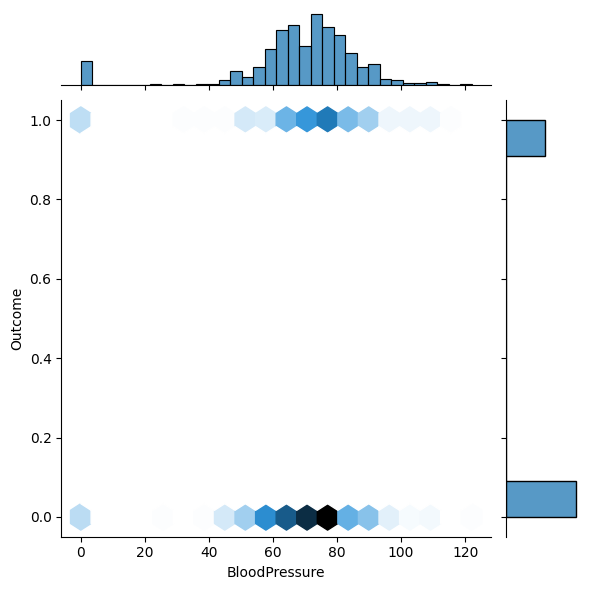

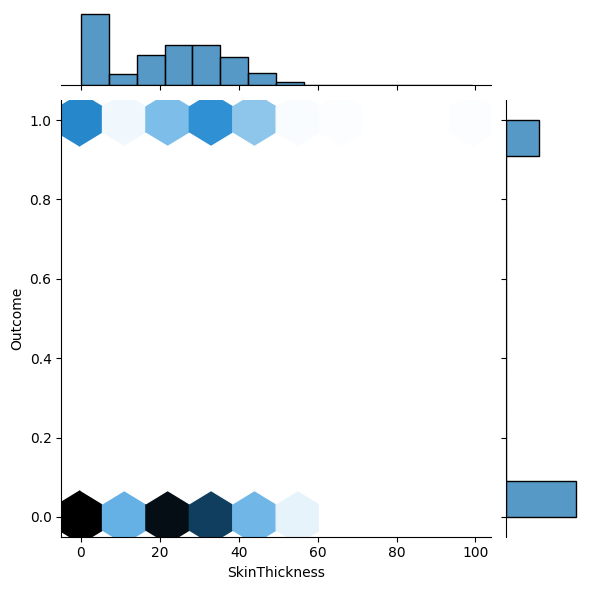

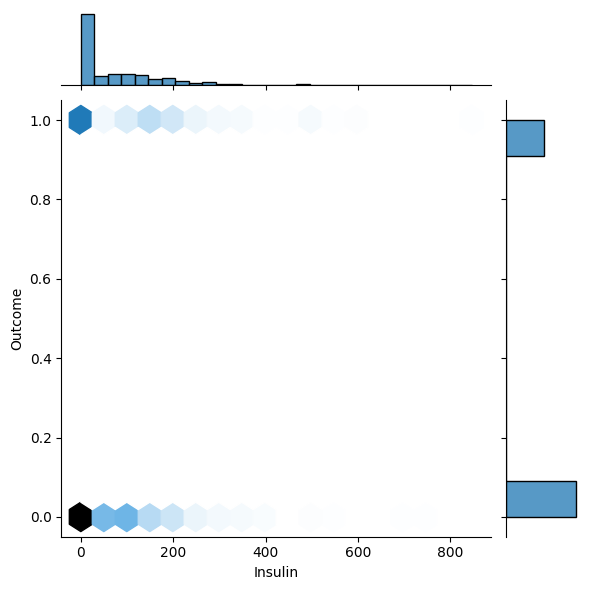

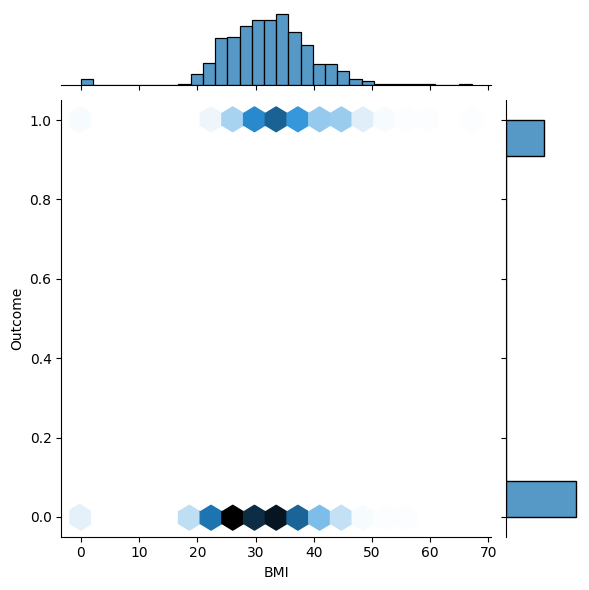

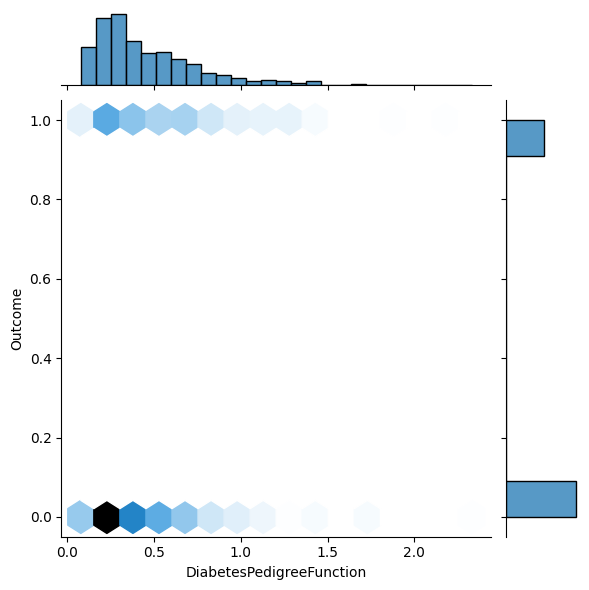

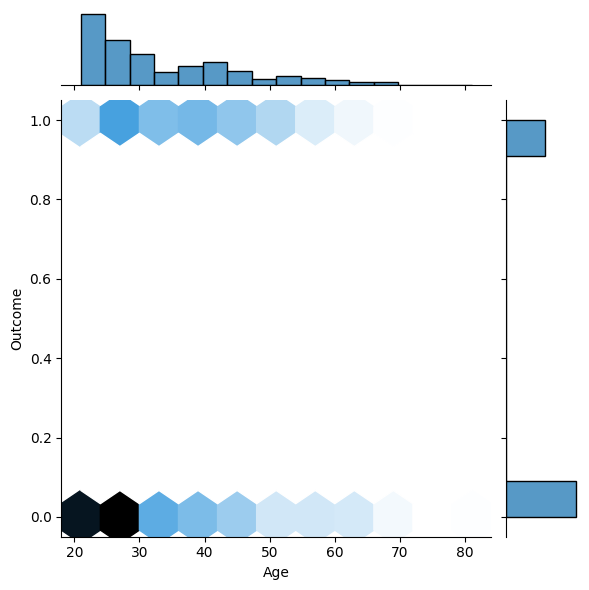

In [13]:
for col in valid.columns:
    if col == 'Outcome':
        continue
    sns.jointplot(x=col, y='Outcome', data=valid, kind='hex')

### 6- Relationship between the features

The 'heatmap' plot is the most suitable plot for this purpose. It shows the correlation between the features.

## Preprocessing

### 1- How to handle missing values

There are many ways to handle missing values. Some of them are as follows:

* Delete the rows which have missing values  

    > In this case, we will lose a lot of data. So, it is not a good idea.

* Delete the columns which have missing values  

    > This case has the same problem as the previous one.

* Fill the missing values with the mean of the feature

    > This method has the problem of losing the variance and changing the distribution of the data.

* Fill the missing values with the mode of the feature

    > This method has the problem of losing the variance and changing the distribution of the data.

* Fill the missing values using `KNNImputer`

    > This method is the best method for this case. This method uses the `n` nearest neighbors to fill the missing values. (KNN algorithm)

We can use a combination of these methods to handle the missing values. For example, we can drop the rows which have missing values in the `Outcome` feature or more than 4 missing values in the other features. Then we can fill the missing values using `KNNImputer`.

### 2- Handling missing values

In [14]:
missing = valid[valid.isna().sum(axis=1) > 4]
display(missing)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
523,NaN,NaN,NaN,31.0,188.0,NaN,0.493,NaN,0
631,5.0,NaN,NaN,NaN,NaN,28.8,0.153,NaN,0


In [15]:
valid.drop(missing.index, inplace=True)
valid.reset_index(drop=True, inplace=True)
valid.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,629.000000,649.000000,675.000000,620.000000,675.000000,678.000000,584.000000,652.000000,761.000000
mean,3.742448,121.263482,69.029630,20.370968,79.693333,32.114749,0.465678,33.449387,0.349540
std,3.354880,32.203394,19.418681,16.002255,115.726691,7.694806,0.320157,11.845480,0.477138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.325000,0.242250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,127.500000,36.600000,0.612250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


In [16]:
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(valid)
imputed = pd.DataFrame(imputed, columns=valid.columns)
imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000,761.000000
mean,3.725099,120.412615,69.000000,20.330618,78.947700,31.948016,0.464059,33.399212,0.349540
std,3.136829,30.886481,18.559013,14.881848,110.474217,7.421853,0.287548,11.221950,0.477138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.400000,64.000000,5.600000,0.000000,27.400000,0.260000,25.000000,0.000000
50%,3.000000,117.000000,70.800000,22.000000,45.000000,32.000000,0.405600,30.000000,0.000000
75%,5.800000,138.400000,78.400000,31.000000,125.000000,36.000000,0.586200,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


As it is shown above, both the `mean` and `std` of the features remained almost the same as the old data after filling the missing values. So, we can use the `KNNImputer` method to fill the missing values.   

By using the `mean` method, the `mean` of the new dataset will be the same as the old one. But the `std` will change a lot.

### 3- Normalization and Standardization, should we use them?

Normalization means scaling the values of the features to a fixed range. For example, we can scale the values of the features to the range of [0, 1] or [-1, 1]. This method is useful when we have no outliers and the data lies in a fixed range. We can use the `MinMaxScaler` method to do this. We can't use normarlziation when we are not using algorithms such as `KNN` or `Neural Networks` which are based on distance. Below is the formula for the `StandardScaler` method:

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Standardization means scaling the values of the features to have a mean of 0 and a standard deviation of 1. This method is useful when we have features with different means and standard deviations. We can use the `StandardScaler` method to do this. Below is the formula for the `StandardScaler` method:

$$X_{std} = \frac{X - \mu}{\sigma}$$

Here we use standardization because of the gaussian distribution of the data.

In [17]:
standardized = StandardScaler().fit_transform(imputed.drop('Outcome', axis=1))
standardized = pd.DataFrame(standardized, columns=imputed.columns[:-1])
standardized['Outcome'] = imputed['Outcome']
standardized.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.610000e+02,7.610000e+02,7.610000e+02,7.610000e+02,7.610000e+02,7.610000e+02,7.610000e+02,7.610000e+02,761.000000
mean,-1.423887e-16,2.567664e-17,1.050408e-17,1.984104e-16,3.384648e-17,3.431333e-16,4.201632e-17,1.517256e-17,0.349540
std,1.000658e+00,1.000658e+00,1.000658e+00,1.000658e+00,1.000658e+00,1.000658e+00,1.000658e+00,1.000658e+00,0.477138
min,-1.188317e+00,-3.901118e+00,-3.720315e+00,-1.367034e+00,-7.150956e-01,-4.307419e+00,-1.343471e+00,-1.105634e+00,0.000000
25%,-8.693144e-01,-6.807650e-01,-2.695881e-01,-9.904889e-01,-7.150956e-01,-6.131901e-01,-7.101175e-01,-7.489550e-01,0.000000
50%,-2.313085e-01,-1.105616e-01,9.705171e-02,1.122495e-01,-3.074928e-01,7.008818e-03,-2.034348e-01,-3.031066e-01,0.000000
75%,6.618996e-01,5.827538e-01,5.068256e-01,7.174109e-01,4.171343e-01,5.463122e-01,4.250467e-01,5.885902e-01,1.000000
max,4.234732e+00,2.546068e+00,2.857634e+00,5.289741e+00,6.947836e+00,4.739396e+00,6.489928e+00,4.244547e+00,1.000000


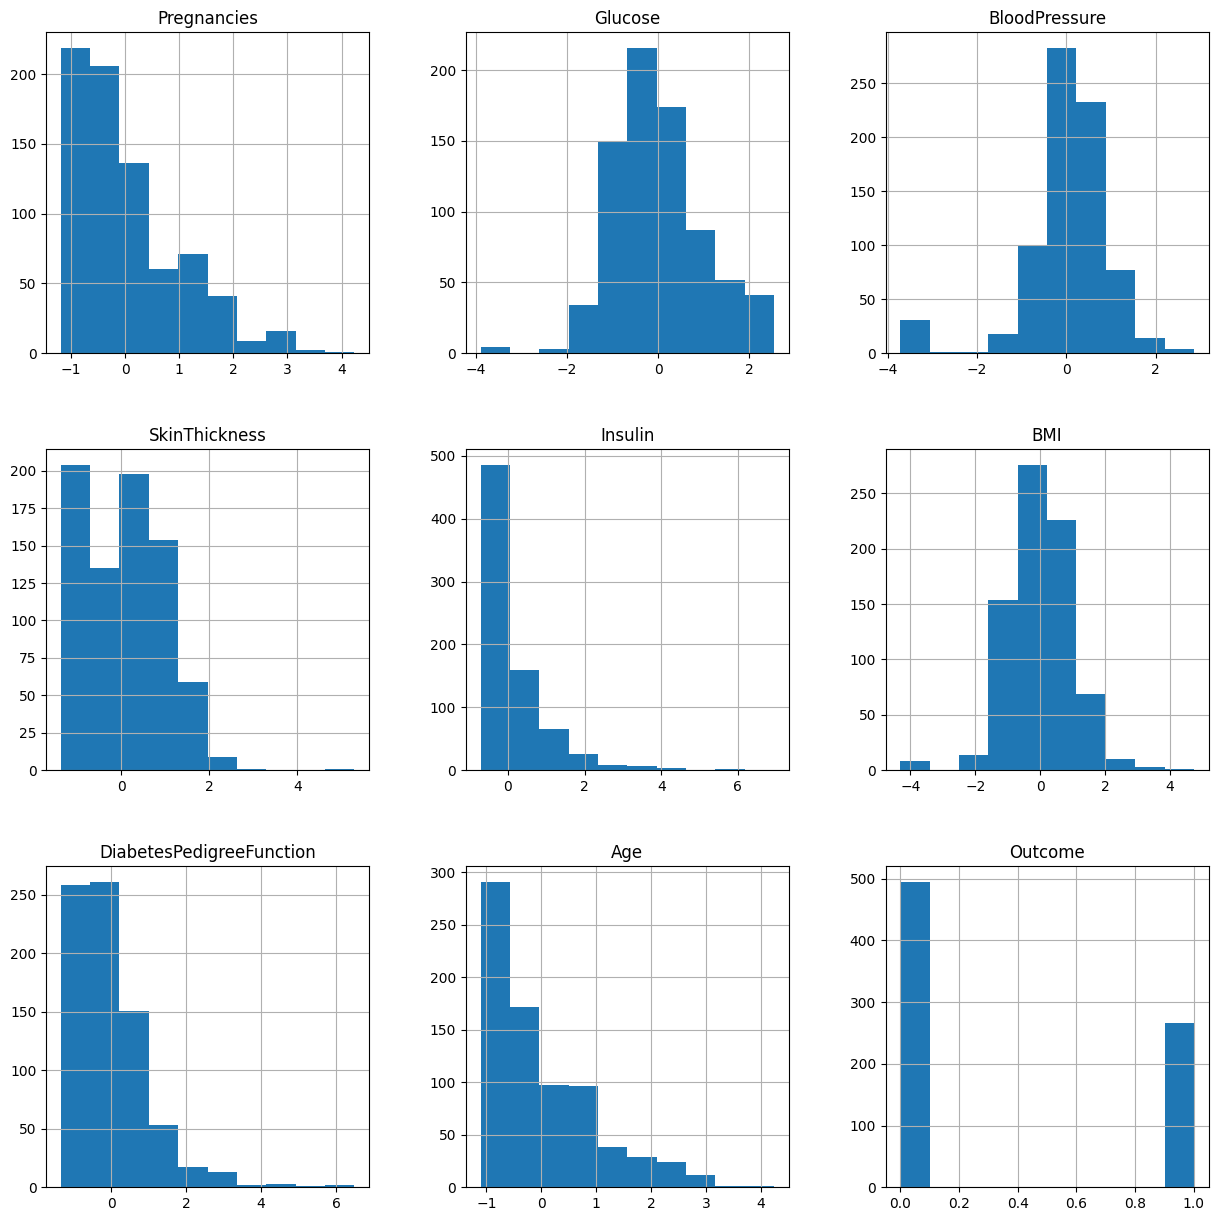

In [18]:
standardized.hist(figsize=(15, 15))
plt.show()

### 4- Category encoding

There are many ways to encode the categorical features. Some of them are as follows:

* `Label Encoding`: Assign a number to each category.  
  > This method is useful when the categories have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
  > Category 1: 0  
  > Category 2: 1  
  > Category 3: 2

* `One-Hot Encoding`: Create a new feature for each category.
    > This method is useful when the categories don't have an order. It is the most useful method for the algorithms that use the distance between the data points, such as `KNN`. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 1, 0, 0  
    > Category 2: 0, 1, 0  
    > Category 3: 0, 0, 1


* `Binary Encoding`: Encode the categories using binary numbers.
    > This method is useful when the categories don't have an order. It is somehow similar to the `One-Hot Encoding` method. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 00  
    > Category 2: 01  
    > Category 3: 10

* `Frequency Encoding`: Encode the categories using the frequency of the categories.
    > This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.25

* `Target Encoding`: Encode the categories using the target mean of the categories.
    > This method is useful when the categories don't have an order. For example, if we have a feature with 3 categories, we can encode them as follows:  
    > Category 1: 0.5  
    > Category 2: 0.25  
    > Category 3: 0.75

As there are no categorical features in this dataset, we don't need to encode them.

### 5- Removing columns

We can remove the columns which have a low correlation with the target. In this case, we can remove the `SkinThickness` and `BloodPressure` features as they have a correlation of less than 10% with the target. I also removed the `Insulin` feature as it has a correlation of less than 20% with the target and it had a lot of missing values.

In [19]:
standardized.drop(['SkinThickness', 'BloodPressure', 'Insulin'], axis=1, inplace=True)
standardized.describe()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.610000e+02,7.610000e+02,7.610000e+02,7.610000e+02,7.610000e+02,761.000000
mean,-1.423887e-16,2.567664e-17,3.431333e-16,4.201632e-17,1.517256e-17,0.349540
std,1.000658e+00,1.000658e+00,1.000658e+00,1.000658e+00,1.000658e+00,0.477138
min,-1.188317e+00,-3.901118e+00,-4.307419e+00,-1.343471e+00,-1.105634e+00,0.000000
25%,-8.693144e-01,-6.807650e-01,-6.131901e-01,-7.101175e-01,-7.489550e-01,0.000000
50%,-2.313085e-01,-1.105616e-01,7.008818e-03,-2.034348e-01,-3.031066e-01,0.000000
75%,6.618996e-01,5.827538e-01,5.463122e-01,4.250467e-01,5.885902e-01,1.000000
max,4.234732e+00,2.546068e+00,4.739396e+00,6.489928e+00,4.244547e+00,1.000000


### 6- Splitting the dataset into train and test sets

Some common percentages for splitting the dataset into train and test sets are as follows:

* 90% train and 10% test

* 80% train and 20% test

* 67% train and 33% test

* 50% train and 50% test

Here we use 80% train and 20% test. (I changed this percentage to 90% train and 10% test in part 3.4)

There are some ways to split the dataset into train and test sets. Some of them are as follows:

* Randomly split the dataset into train and test sets

    > This method is the most common method. But it has a problem. If we split the dataset randomly, the train and test sets may not have the same distribution. 

* Split the dataset based on the time
    
    > This method is useful when we have a time series dataset. But it is not useful in this case.

* Split the dataset based on the target
  
    > This method is useful when we have an imbalanced dataset.

Here we use the first method.

There exists various methods to split the dataset randomly. The most common methods presented below:

* `train_test_split` method

* `randn` method of the `numpy` library

* `sample` method of the `pandas` library

The first method is used here.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(standardized.drop('Outcome', axis=1), standardized['Outcome'], test_size=0.1, random_state=4)

The `random_state` is the seed used by the random number generator. It is used to make the results reproducible. If we don't set the `random_state`, the results will be different every time we run the code.

### 7- Validation set

Validation set is used to evaluate the performance of the model and prevent overfitting.

## Training, Testing and Evaluating the Models

In this section, we will train, test and evaluate the models. We will use the following models:

* Logistic Regression

* KNN

* Decision Tree

#### Logistic Regression

Logistic regression is a linear model for classification and it usually used when the target is binary. The output of the logistic regression is between 0 and 1 and it is calculated using the sigmoid function. The sigmoid function is as follows:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

where $x$ is the activation function. The activation function is calculated using the following formula:

$$z = w_1x_1 + w_2x_2 + ... + w_nx_n + b$$

where $w_i$ is the weight of the $i^{th}$ feature, $x_i$ is the value of the $i^{th}$ feature, $b$ is the bias and $n$ is the number of features.

In [21]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print(f'Logistic Regression Accuracy: {logistic.score(X_test, y_test) * 100:5.2f}%')

Logistic Regression Accuracy: 79.22%


#### KNN

KNN is a classification algorithm which is based on distance. It classifies a data point based on the majority of the classes of the `k` nearest neighbors.

In [22]:
knn = KNeighborsClassifier(n_neighbors=70)
knn.fit(X_train, y_train)
print(f'KNN Accuracy: {knn.score(X_test, y_test) * 100:5.2f}%')

KNN Accuracy: 80.52%


#### Decision Tree

Decision tree is a classification algorithm which is based on the decision rules. It classifies a data point based on the decision rules. The decision rules are based on the features and their values.

In [23]:
tree = DecisionTreeClassifier(random_state=73)
tree.fit(X_train, y_train)
print(f'Decision Tree Accuracy: {tree.score(X_test, y_test) * 100:5.2f}%')

Decision Tree Accuracy: 80.52%


### 1- Finding the accuracy of the models using confusion matrix

#### Logistic Regression

Text(50.722222222222214, 0.5, 'Truth')

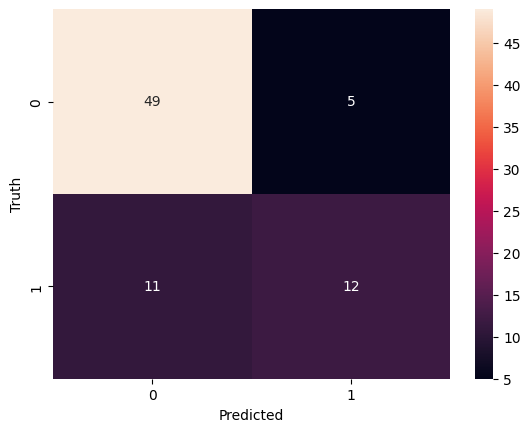

In [24]:
cm = confusion_matrix(y_test, logistic.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

As it is shown above, the accuracy of the `Logistic Regression` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{49 + 12}{49 + 12 + 5 + 11} = 79.22\%$$

where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives and $FN$ is the number of false negatives.

#### KNN

Text(50.722222222222214, 0.5, 'Truth')

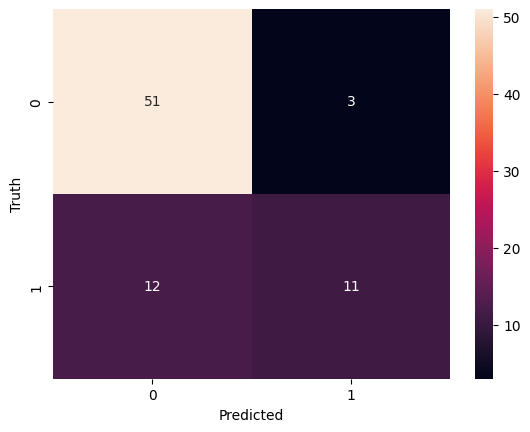

In [25]:
cm = confusion_matrix(y_test, knn.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

As it is shown above, the accuracy of the `KNN` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{51 + 11}{51 + 11 + 12 + 13} = 80.52\%$$

where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives and $FN$ is the number of false negatives.

#### Decision Tree

Text(50.722222222222214, 0.5, 'Truth')

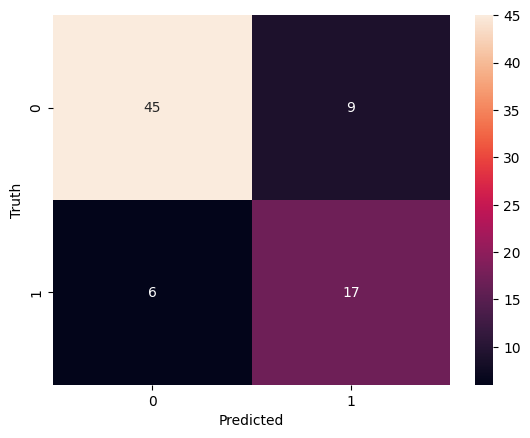

In [26]:
cm = confusion_matrix(y_test, tree.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

As it is shown above, the accuracy of the `Decision Tree` model can be calculated using the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN} = \frac{45 + 17}{45 + 17 + 9 + 6} = 80.52\%$$

where $TP$ is the number of true positives, $TN$ is the number of true negatives, $FP$ is the number of false positives and $FN$ is the number of false negatives.

### 2- Finding the hyperparameters of the models using Grid Search

Parameters for `GridSearchCV`:

* `estimator`: The model which we want to find the hyperparameters.

* `param_grid`: The hyperparameters which we want to find.

* `cv`: Number of folds for cross-validation. (validation set)

* `scoring`: The scoring method which we want to use.

* `n_jobs`: Number of jobs to run in parallel. `-1` means using all processors.

#### Logistic Regression

In [27]:
grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
logistic_grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=grid, scoring='accuracy', cv=10, n_jobs=-1)
logistic_grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {logistic_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {logistic_grid_search.best_params_}')
print(f'Logistic Regression Accuracy: {logistic_grid_search.score(X_test, y_test) * 100:5.2f}%')

Best Accuracy: 76.02%
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Logistic Regression Accuracy: 79.22%


Hyperparameters of the `Logistic Regression` model:

* `C`: Inverse of regularization strength. Smaller values specify stronger regularization. Actually, the lower the value of `C`, prevents the model from overfitting.

* `penalty`: Used to specify the norm used in the penalization. The following values can be used for this parameter:

    * `l1`: The L1 norm is the sum of the absolute values of the vector elements. (Most of the solvers don't support this parameter, so we don't use it here.)

    * `l2`: The L2 norm is the square root of the sum of the squared vector elements.

* `solver`: Algorithm to use in the optimization problem.

In [28]:
grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski'], 
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'p': [1, 2]}
knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, scoring='accuracy', cv=10, n_jobs=-1)
knn_grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {knn_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {knn_grid_search.best_params_}')
print(f'KNN Accuracy: {knn_grid_search.score(X_test, y_test) * 100:5.2f}%')

Best Accuracy: 75.30%
Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
KNN Accuracy: 79.22%


Hyperparameters of the `KNN` model:

* `n_neighbors`: Number of neighbors to use by default for `kneighbors` queries.

* `weights`: Weight function used in prediction. Possible values:

    * `uniform`: uniform weights. All points in each neighborhood are weighted equally.

    * `distance`: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

* `metric`: The distance metric to use for the tree. The default metric is `minkowski`, and with `p=2` is equivalent to the standard Euclidean metric.

* `algorithm`: Algorithm used to compute the nearest neighbors.

* `leaf_size`: Leaf size passed to `BallTree` or `KDTree`. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

* `p`: Power parameter for the Minkowski metric. When `p = 1`, this is equivalent to using `manhattan_distance` (l1), and `euclidean_distance` (l2) for `p = 2`. For arbitrary `p`, minkowski_distance (l_p) is used.

In [29]:
grid = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10], 
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'random_state': [73]}
tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, scoring='accuracy', cv=10, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {tree_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {tree_grid_search.best_params_}')
print(f'Decision Tree Accuracy: {tree_grid_search.score(X_test, y_test) * 100:5.2f}%')

Best Accuracy: 74.41%
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 7, 'random_state': 73, 'splitter': 'random'}
Decision Tree Accuracy: 76.62%


Hyperparameters of the `Decision Tree` model:

* `criterion`: The function to measure the quality of a split. Supported criteria are `"gini"` for the Gini impurity and `"entropy"` for the information gain.

* `splitter`: The strategy used to choose the split at each node. Supported strategies are `"best"` to choose the best split and `"random"` to choose the best random split.

* `max_depth`: The maximum depth of the tree. If `None`, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.

* `min_samples_split`: The minimum number of samples required to split an internal node.

* `min_samples_leaf`: The minimum number of samples required to be at a leaf node.

### 3- Overfitting and Underfitting

#### Overfitting

Overfitting is a situation in which the model fits the training data too well. In other words, the model is too complex and it memorizes the training data. As a result, the model performs well on the training data but it performs poorly on the test data.

#### Underfitting

Underfitting is a situation in which the model is too simple and it doesn't fit the training data well. In other words, the model is too simple and it doesn't memorize the training data. As a result, the model performs poorly on both the training data and the test data.

The used models are not overfitting or underfitting. The reason is that the models are not too complex or too simple. This is why both the training accuracy and the test accuracy are almost the same and they are high enough. We can prevent overfitting and underfitting by using validation set and cross-validation. `GridSearchCV` uses cross-validation to prevent overfitting and underfitting.

### 4- Changing the pre-processing steps to improve the models

I changed the test percentage to 10% and removed the `Insulin` column because it had too many missing values. This change improved the models.

## Ensemble Learning: Random Forest

In [30]:
grid = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 6, 7, 8, 9, 10, None], 
        'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4], 'random_state': [73]}
forest_grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, scoring='accuracy', cv=10, n_jobs=-1)
forest_grid_search.fit(X_train, y_train)
print(f'Best Accuracy: {forest_grid_search.best_score_ * 100:5.2f}%')
print(f'Best Parameters: {forest_grid_search.best_params_}')
print(f'Random Forest Accuracy: {forest_grid_search.score(X_test, y_test) * 100:5.2f}%')

Best Accuracy: 75.15%
Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'random_state': 73}
Random Forest Accuracy: 81.82%
